In [69]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [70]:
from scipy.io import loadmat

# Charger le fichier MATLAB
data = loadmat('binaryalphadigs.mat')

# Afficher les clés disponibles dans le fichier
print("Clés disponibles dans le fichier MATLAB :", data.keys())

variable_names = [name for name in data.keys()]
print("Noms de toutes les variables :", variable_names)
# Accéder aux données par clé
var = data['classlabels']
donnees=data['dat']
# Faire quelque chose avec votre_variable


Clés disponibles dans le fichier MATLAB : dict_keys(['__header__', '__version__', '__globals__', 'dat', 'numclass', 'classlabels', 'classcounts'])
Noms de toutes les variables : ['__header__', '__version__', '__globals__', 'dat', 'numclass', 'classlabels', 'classcounts']


In [71]:
def lire_alpha_digits(fichier,caract):
  data = loadmat(fichier)
  donnees=data['dat']
  #k le nombre de caractères à extraire
  k =len(caract)
  print(len(donnees[1]))#39
  print(len(donnees[0][1]))
  X=np.zeros((k*len(donnees[1]),donnees[0][0].shape[1]*len(donnees[0][1])))#320
  l=[]
  for i in range (k):
    for j in range (len(donnees[1])):

      X[i*len(donnees[1])+j,:]=donnees[caract[i]][j].flatten()

    #X=np.array(l)

  return X

In [72]:
X=lire_alpha_digits('binaryalphadigs.mat',[10,11,12,13,14,15,16,17,18,19])

39
20


In [73]:
X
print(X[0].shape[0],X[1])

320 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1.]


In [74]:
def F_sigmoid(X):
  return 1/(1+np.exp(-X))

In [123]:
class rbm:
  def __init__(self,p,q):
    l,l1=[0],[0]
    self.p=p
    self.q=q
    self.w=np.random.rand(p,q)*np.sqrt(0.01)
    self.a=np.zeros(self.p)

    self.b=np.zeros(self.q)
  def entree_sortie_RBM(self,X):
    sortie=F_sigmoid(np.dot(X,self.w)+self.b)
    return sortie
  def sortie_entree_RBM(self,H):
    entree=F_sigmoid(np.dot(H,np.transpose(self.w))+self.a)
    return entree
  def train_RBM(self,X,lr,batch_size,nb_iter):
    for i in range(nb_iter):
      #print("original array",X)
      np.random.shuffle(X)
      #print("after shuffle",X)
      for j in range (0,np.size(X,axis=0),batch_size):
        X_batch=X[j:min(np.size(X,axis=0),j+batch_size),:]
        tb=np.size(X_batch,axis=0)
        #print("tb= ",tb)
        v_0=X_batch
        p_h_v_0=self.entree_sortie_RBM(v_0)
        h_0=(np.random.rand(tb,self.q)<p_h_v_0)*1
        p_v_h_0=self.sortie_entree_RBM(h_0)

        v_1=(np.random.rand(tb,self.p)<p_v_h_0)*1
        p_h_v_1=self.entree_sortie_RBM(v_1)
        grad_a=np.sum(v_0-v_1,axis=0)
        #print("taille",p_h_v_1.shape[1])
        grad_b=np.sum(p_h_v_0-p_h_v_1,axis=0)
        grad_w=np.transpose(v_0)@p_h_v_0-(np.transpose(v_1)@p_h_v_1)
        self.w=self.w+(lr/tb)*grad_w
        self.a=self.a+(lr/tb)*grad_a
        self.b=self.b +(lr/tb)*grad_b
      h=self.entree_sortie_RBM(X)
      x_rec=self.sortie_entree_RBM(h)
      err=(np.sum(np.square(X-x_rec)))/np.size(X,axis=0)
    return err
  def generer_img(self,nbr_iter_g_gibbs,nb_img):
    data=[]
    p=len(self.a)


    #print("this",donnees[0][0].shape[1])
    for k in range(nb_img):
     v=(np.random.rand(p)<np.random.rand(self.p))*1
     #print("v",v)
     for i in range (nbr_iter_g_gibbs):
      #print("here",self.entree_sortie_RBM(v))
      h=(np.random.rand(self.q)<self.entree_sortie_RBM(v))*1
      #print("or here",self.sortie_entree_RBM(h))
      v=(np.random.rand(self.p)<self.sortie_entree_RBM(h))*1
     v=v.reshape(width,height)
     data.append(v)
    return data




In [76]:
def affichages(img, size, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(15, 6))

    for i in range(rows):
        for j in range(cols):
            index = i * cols + j
            if index < len(img):  # Vérifiez si l'indice est dans les limites de la liste
                image = img[index].reshape(size)
                axs[i, j].imshow(image, cmap='gray')
                axs[i, j].axis('off')
            else:
                axs[i, j].axis('off')  # Si l'indice est en dehors des limites, désactivez l'axe

    plt.show()

In [77]:
r=rbm(320,200)

In [78]:
#H=r.entree_sortie_RBM(X)

In [79]:
#e=r.sortie_entree_RBM(H)

In [80]:
erreur=r.train_RBM(X,0.001,2,1000)

In [81]:
print(erreur)

3.807907490548548


In [82]:
width=donnees[0][1].shape[0]
height=donnees[0][0].shape[1]
image=r.generer_img(1000,10)


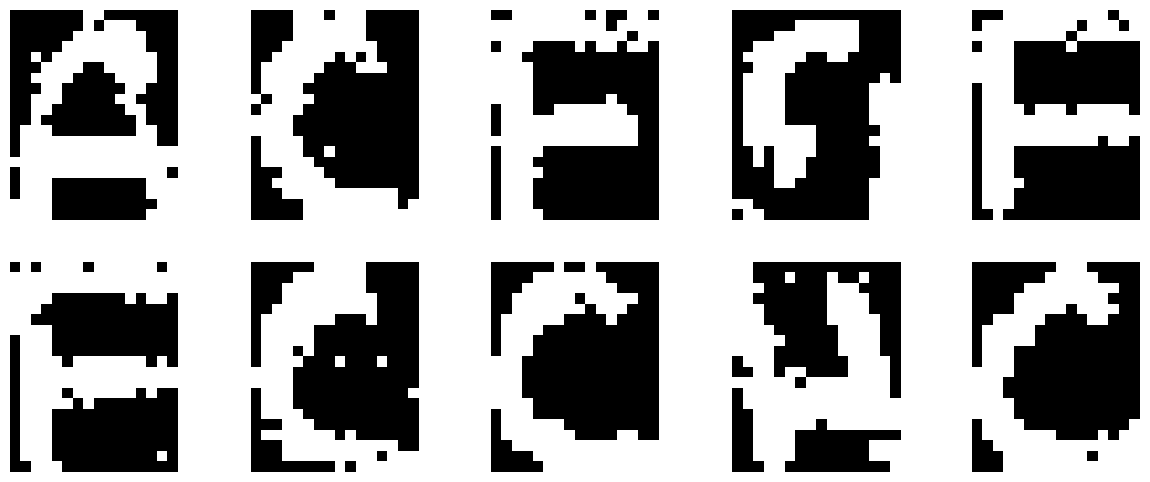

In [83]:
affichages(image,data['dat'][0][0].shape,2,5)

**Variation de learning rate**

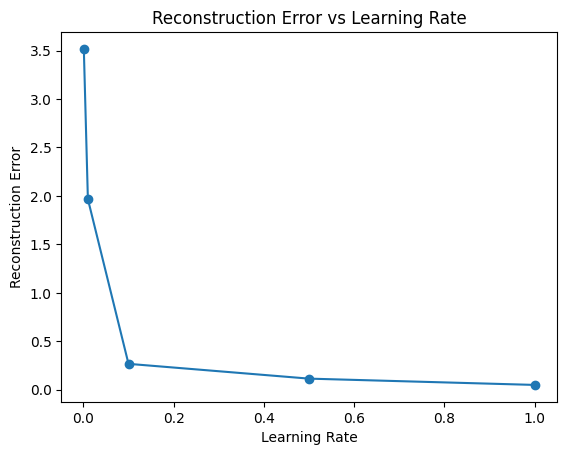

In [84]:
def plot_error_vs_lr(learning_rates):
    errors = []

    for lr in learning_rates:
        error = r.train_RBM(X, batch_size=4, nb_iter=100,lr=lr)
        errors.append(error)

    plt.plot(learning_rates, errors, marker='o')
    plt.xlabel('Learning Rate')
    plt.ylabel('Reconstruction Error')
    plt.title('Reconstruction Error vs Learning Rate')
    plt.show()

# Exemple d'utilisation
learning_rates_to_test = [0.001, 0.01, 0.1, 0.5, 1.0]
plot_error_vs_lr(learning_rates_to_test)

**Analyse de l'erreur de reconstruction en fonction de q**






39
20
39
20
39
20
39
20
        q #characters  Reconstruction Error
0    20.0           1              0.068340
1    40.0           1              0.027386
2    60.0           1              0.013406
3    80.0           1              0.006279
4   100.0           1              0.006963
5   120.0           1              0.003054
6   140.0           1              0.003219
7   160.0           1              0.002024
8   180.0           1              0.001653
9    20.0           2              0.085278
10   40.0           2              0.039281
11   60.0           2              0.022686
12   80.0           2              0.012391
13  100.0           2              0.008431
14  120.0           2              0.005933
15  140.0           2              0.004340
16  160.0           2              0.002835
17  180.0           2              0.002482
18   20.0           3              0.095462
19   40.0           3              0.060568
20   60.0           3              0.042106
21   80.

<Axes: xlabel='q', ylabel='Reconstruction Error'>

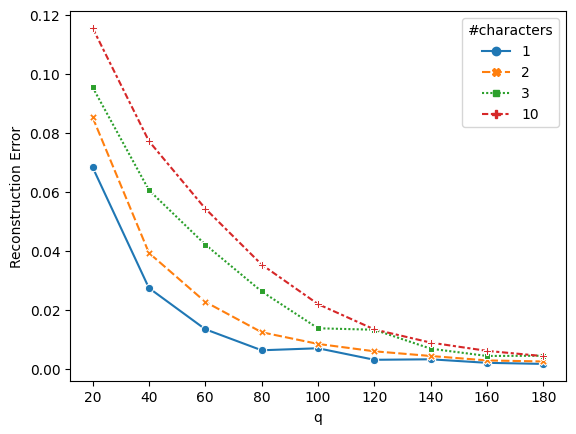

In [85]:
import pandas as pd
import seaborn as sns
p = 20 * 16
#changing q
errors = []

for n_digits in [1, 2, 3, 10]:
    digits = lire_alpha_digits('binaryalphadigs.mat', list(range(10, 10+n_digits)))
    digits_vecs = digits.reshape((-1, 20*16))
    for q in range(20, 200, 20):
        r1 = rbm(p, q)
        r1.train_RBM(digits_vecs, batch_size=4, nb_iter=100,lr=0.1)

        errors.append([q, n_digits, np.mean(np.power(digits_vecs - r1.sortie_entree_RBM(r1.entree_sortie_RBM(digits_vecs)),2))])

df_q = pd.DataFrame(np.array(errors), columns=['q', '#characters', 'Reconstruction Error'])
df_q['#characters'] = df_q['#characters'].astype('int').astype('str')
print(df_q)
sns.lineplot(data=df_q, x='q', y='Reconstruction Error', hue='#characters', style='#characters', markers=True, dashes=True)
# y: reconstruction error
# x: number of hidden units

**en fonction de batch_size**

39
20
39
20
39
20
39
20
    Batch size #characters  Reconstruction Error
0          1.0           1              0.005701
1         11.0           1              0.016974
2         21.0           1              0.038337
3         31.0           1              0.039225
4         41.0           1              0.069113
5         51.0           1              0.069141
6         61.0           1              0.069174
7         71.0           1              0.068217
8         81.0           1              0.070375
9         91.0           1              0.071387
10       101.0           1              0.071173
11       111.0           1              0.070263
12         1.0           2              0.004822
13        11.0           2              0.028493
14        21.0           2              0.044713
15        31.0           2              0.056184
16        41.0           2              0.072698
17        51.0           2              0.073469
18        61.0           2              0.077

<Axes: xlabel='Batch size', ylabel='Reconstruction Error'>

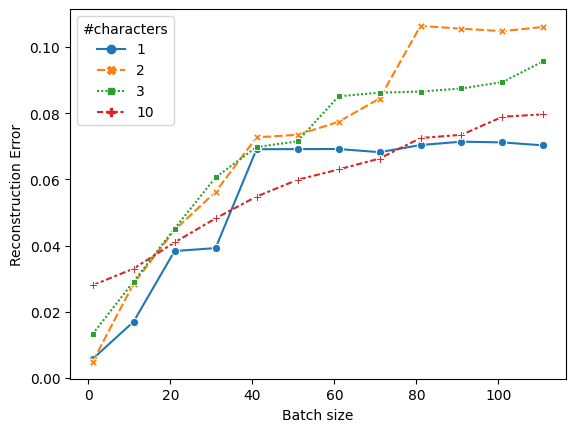

In [86]:
q = 100
errors_batch_size = []

for n_digits in [1, 2, 3, 10]:
    digits = lire_alpha_digits('binaryalphadigs.mat', list(range(10, 10+n_digits)))
    digits_vecs = digits.reshape((-1, 20*16))

    for batch_size in range(1, 120, 10):
        r2 = rbm(p, q)
        r2.train_RBM(digits_vecs, batch_size=batch_size, nb_iter=100,lr=0.1)

        errors_batch_size.append([batch_size, n_digits, np.mean(np.power(digits_vecs - r2.sortie_entree_RBM(r2.entree_sortie_RBM(digits_vecs)),2))])

df_bs = pd.DataFrame(np.array(errors_batch_size), columns=['Batch size', '#characters', 'Reconstruction Error'])
df_bs['#characters'] = df_bs['#characters'].astype('int').astype('str')
print(df_bs)
sns.lineplot(data=df_bs, x='Batch size', hue='#characters', y='Reconstruction Error', style='#characters', markers=True, dashes=True)
# y: reconstruction error
# x: batch size


**en fonction du learning rate**

In [87]:
erreur=r.train_RBM(X,0.001,2,1000)
print(erreur)


0.0003817735607863882


**EN fonction du nombre  de caractères à apprendre**
---



39
20
39
20
39
20
39
20
39
20
39
20
39
20
39
20
39
20
39
20


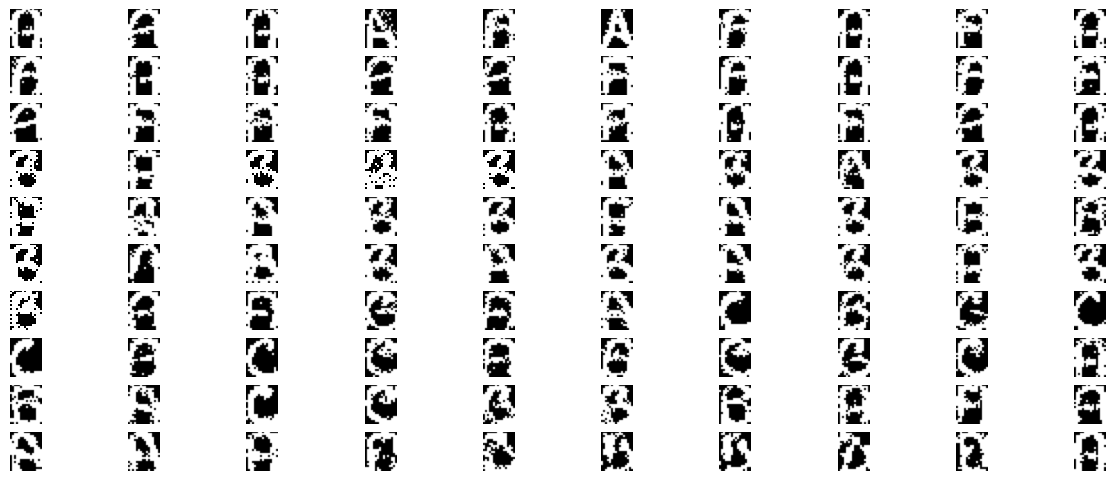

In [88]:
# random init True
p = 20*16
q = 100
batch_size=4
errors = []
outs = []
for n_digits in range(1, 11):
    digits_vecs = lire_alpha_digits('binaryalphadigs.mat', list(range(10, 10+n_digits))).reshape((-1, 20*16))

    r3 = rbm(p, q)
    r3.train_RBM(digits_vecs, batch_size=batch_size, nb_iter=100,lr=0.1)
    errors.append(np.mean(np.power(digits_vecs - r3.sortie_entree_RBM(r3.entree_sortie_RBM(digits_vecs)),2)))
    outs.extend(r3.generer_img( nbr_iter_g_gibbs=100,nb_img=30))
affichages(np.array(outs),data['dat'][0][0].shape,10,
           10)
#display_samples(np.array(outs), n_cols=10, n_rows=10, fig_x=10, fig_y=10)

In [92]:
r=rbm(320,500)

39
20
0.6425124667733991


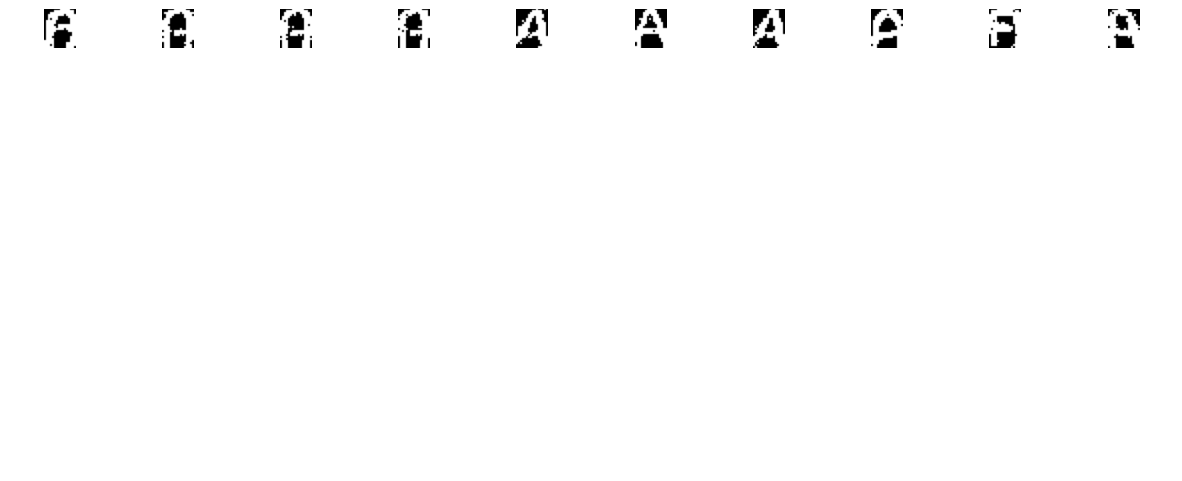

In [93]:
#avec un seul caractère A
X=lire_alpha_digits('binaryalphadigs.mat',[10])
erreur=r.train_RBM(X,0.001,2,1000)
print(erreur)
image=r.generer_img(1000,10)
affichages(image,data['dat'][0][0].shape,10,
           10)


39
20
0.40027441235012856


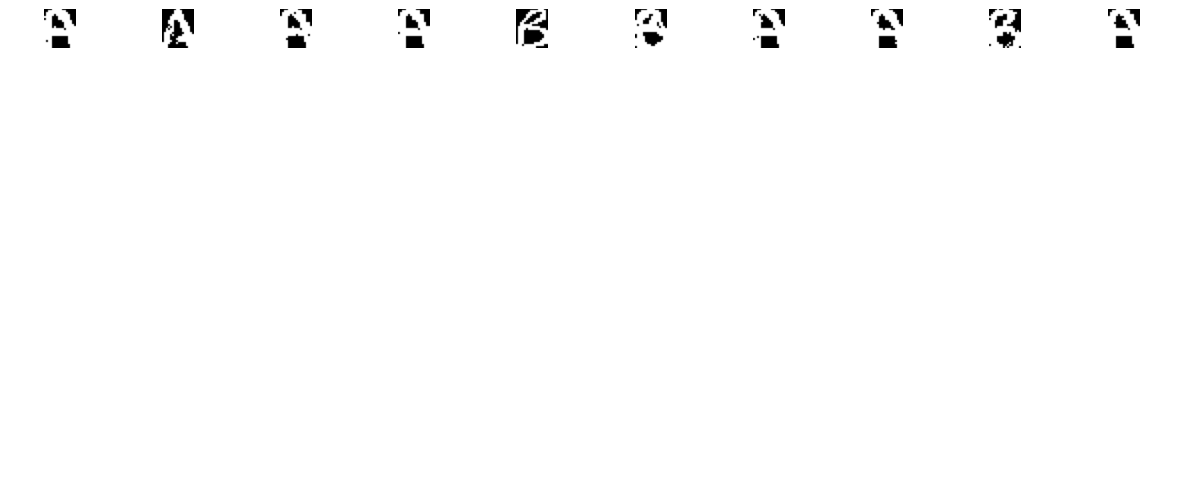

In [94]:
#avec 3 caractères A , B et C
X=lire_alpha_digits('binaryalphadigs.mat',[10,11,12])
erreur=r.train_RBM(X,0.001,2,1000)
print(erreur)
image=r.generer_img(1000,10)
affichages(image,data['dat'][0][0].shape,10,
           10)


In [95]:
#avec 20 caractères à partir de A
X=lire_alpha_digits('binaryalphadigs.mat',[10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29])
erreur=r.train_RBM(X,0.001,2,1000)
print(erreur)

39
20
0.28836005329191217


0.28836005329191217


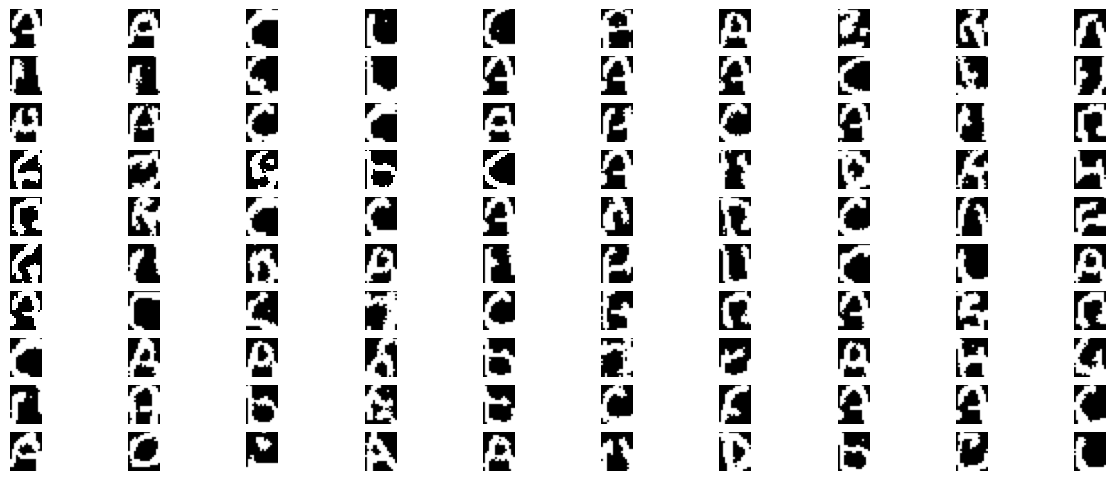

In [97]:
print(erreur)
image=r.generer_img(1000,100)
affichages(image,data['dat'][0][0].shape,10,
           10)

**MNIST**

In [119]:
from scipy.io.matlab import mio
import random
def lire_mnist(caracteres):
    matrice, samples = [], []
    for caractere in caracteres:
        for example in fichier['train'+str(caractere)]:
            example = (example > 255/2)*1  # Binarization
            samples.append(example.reshape(28*28)) # Reshape
        samples = random.sample(samples, 250)
        matrice += samples
    return np.array(matrice)


width, height = 28, 28
fichier = mio.loadmat("./mnist_all")
data = lire_mnist([1,2])

model = rbm(784,500)
model.train_RBM(data,lr=0.1,batch_size=2,nb_iter=100)



<ipython-input-119-8f3424b601ce>:15: DeprecationWarning: Please use `loadmat` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.mio` namespace is deprecated.
  fichier = mio.loadmat("./mnist_all")


0.07509961827296155

In [120]:
image=model.generer_img( nbr_iter_g_gibbs=100, nb_img=20)


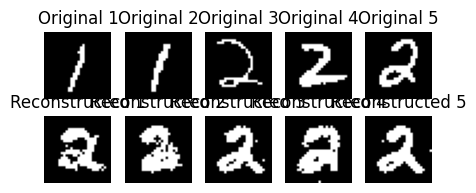

In [121]:
def plot_images(original, reconstructed, num_images=5):
    fig, axes = plt.subplots(2, num_images, figsize=(num_images, 2))

    for i in range(num_images):
        axes[0, i].imshow(original[i].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')
        axes[0, i].set_title(f'Original {i+1}')

        axes[1, i].imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        axes[1, i].axis('off')
        axes[1, i].set_title(f'Reconstructed {i+1}')

    plt.show()
plot_images(data, image)

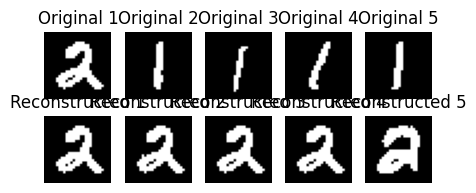

In [122]:
#300 epoch
model.train_RBM(data,lr=0.1,batch_size=2,nb_iter=300)
image=model.generer_img( nbr_iter_g_gibbs=100, nb_img=20)
plot_images(data, image)


**comparer avec GAN**

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [105]:
import argparse
import os
import numpy as np
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

os.makedirs("images", exist_ok=True)

parser = argparse.ArgumentParser()
parser.add_argument("--n_epochs", type=int, default=10, help="number of epochs of training")
parser.add_argument("--batch_size", type=int, default=64, help="size of the batches")
parser.add_argument("--lr", type=float, default=0.0002, help="adam: learning rate")
parser.add_argument("--b1", type=float, default=0.5, help="adam: decay of first order momentum of gradient")
parser.add_argument("--b2", type=float, default=0.999, help="adam: decay of first order momentum of gradient")
parser.add_argument("--n_cpu", type=int, default=8, help="number of cpu threads to use during batch generation")
parser.add_argument("--latent_dim", type=int, default=100, help="dimensionality of the latent space")
parser.add_argument("--n_classes", type=int, default=10, help="number of classes for dataset")
parser.add_argument("--img_size", type=int, default=32, help="size of each image dimension")
parser.add_argument("--channels", type=int, default=1, help="number of image channels")
parser.add_argument("--sample_interval", type=int, default=400, help="interval between image sampling")
#opt = parser.parse_args()
opt, unknown = parser.parse_known_args()

print(opt)

img_shape = (opt.channels, opt.img_size, opt.img_size)

cuda = True if torch.cuda.is_available() else False


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.label_emb = nn.Embedding(opt.n_classes, opt.n_classes)

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(opt.latent_dim + opt.n_classes, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        # Concatenate label embedding and image to produce input
        gen_input = torch.cat((self.label_emb(labels), noise), -1)
        img = self.model(gen_input)
        img = img.view(img.size(0), *img_shape)
        return img


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.label_embedding = nn.Embedding(opt.n_classes, opt.n_classes)

        self.model = nn.Sequential(
            nn.Linear(opt.n_classes + int(np.prod(img_shape)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 512),
            nn.Dropout(0.4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 512),
            nn.Dropout(0.4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1),
        )

    def forward(self, img, labels):
        # Concatenate label embedding and image to produce input
        d_in = torch.cat((img.view(img.size(0), -1), self.label_embedding(labels)), -1)
        validity = self.model(d_in)
        return validity


# Loss functions
adversarial_loss = torch.nn.MSELoss()

# Initialize generator and discriminator
generator = Generator()
discriminator = Discriminator()

if cuda:
    generator.cuda()
    discriminator.cuda()
    adversarial_loss.cuda()

Namespace(n_epochs=10, batch_size=64, lr=0.0002, b1=0.5, b2=0.999, n_cpu=8, latent_dim=100, n_classes=10, img_size=32, channels=1, sample_interval=400)


In [106]:

# Configure data loader
os.makedirs("/content/drive/MyDrive/data/mnist", exist_ok=True)
os.makedirs("/content/drive/MyDrive/data/gen_im", exist_ok=True)
dataloader = torch.utils.data.DataLoader(
    datasets.MNIST(
        "/content/drive/MyDrive/data/mnist",
        train=True,
        download=True,
        transform=transforms.Compose(
            [transforms.Resize(opt.img_size), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]
        ),
    ),
    batch_size=opt.batch_size,
    shuffle=True,
)

# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=opt.lr, betas=(opt.b1, opt.b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=opt.lr, betas=(opt.b1, opt.b2))

FloatTensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if cuda else torch.LongTensor


def sample_image(n_row, batches_done):
    """Saves a grid of generated digits ranging from 0 to n_classes"""
    # Sample noise
    z = Variable(FloatTensor(np.random.normal(0, 1, (n_row ** 2, opt.latent_dim))))
    # Get labels ranging from 0 to n_classes for n rows
    labels = np.array([num for _ in range(n_row) for num in range(n_row)])
    labels = Variable(LongTensor(labels))
    gen_imgs = generator(z, labels)
    save_image(gen_imgs.data, os.path.join("/content/drive/MyDrive/data/gen_im/", "images_colab %d.png" % batches_done), nrow=n_row, normalize=True)




# ----------
#  Training
# ----------

for epoch in range(opt.n_epochs):
    for i, (imgs, labels) in enumerate(dataloader):

        batch_size = imgs.shape[0]

        # Adversarial ground truths
        valid = Variable(FloatTensor(batch_size, 1).fill_(1.0), requires_grad=False)
        fake = Variable(FloatTensor(batch_size, 1).fill_(0.0), requires_grad=False)

        # Configure input
        real_imgs = Variable(imgs.type(FloatTensor))
        labels = Variable(labels.type(LongTensor))

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()

        # Sample noise and labels as generator input
        z = Variable(FloatTensor(np.random.normal(0, 1, (batch_size, opt.latent_dim))))
        gen_labels = Variable(LongTensor(np.random.randint(0, opt.n_classes, batch_size)))

        # Generate a batch of images
        gen_imgs = generator(z, gen_labels)

        # Loss measures generator's ability to fool the discriminator
        validity = discriminator(gen_imgs, gen_labels)
        g_loss = adversarial_loss(validity, valid)

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Loss for real images
        validity_real = discriminator(real_imgs, labels)
        d_real_loss = adversarial_loss(validity_real, valid)

        # Loss for fake images
        validity_fake = discriminator(gen_imgs.detach(), gen_labels)
        d_fake_loss = adversarial_loss(validity_fake, fake)

        # Total discriminator loss
        d_loss = (d_real_loss + d_fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        print(
            "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
            % (epoch, opt.n_epochs, i, len(dataloader), d_loss.item(), g_loss.item())
        )

        batches_done = epoch * len(dataloader) + i
        if batches_done % opt.sample_interval == 0:
            sample_image(n_row=10, batches_done=batches_done)
            torch.save(generator.state_dict(), '/content/drive/MyDrive/data/gen_im/model.pth')



Streaming output truncated to the last 5000 lines.
[Epoch 4/10] [Batch 628/938] [D loss: 0.136944] [G loss: 0.615520]
[Epoch 4/10] [Batch 629/938] [D loss: 0.166375] [G loss: 0.479206]
[Epoch 4/10] [Batch 630/938] [D loss: 0.116777] [G loss: 0.623834]
[Epoch 4/10] [Batch 631/938] [D loss: 0.150663] [G loss: 0.566553]
[Epoch 4/10] [Batch 632/938] [D loss: 0.139440] [G loss: 0.450076]
[Epoch 4/10] [Batch 633/938] [D loss: 0.152273] [G loss: 0.683915]
[Epoch 4/10] [Batch 634/938] [D loss: 0.140852] [G loss: 0.373191]
[Epoch 4/10] [Batch 635/938] [D loss: 0.188068] [G loss: 0.825321]
[Epoch 4/10] [Batch 636/938] [D loss: 0.233860] [G loss: 0.159262]
[Epoch 4/10] [Batch 637/938] [D loss: 0.169341] [G loss: 0.822584]
[Epoch 4/10] [Batch 638/938] [D loss: 0.151437] [G loss: 0.605464]
[Epoch 4/10] [Batch 639/938] [D loss: 0.154256] [G loss: 0.352937]
[Epoch 4/10] [Batch 640/938] [D loss: 0.130480] [G loss: 0.639131]
[Epoch 4/10] [Batch 641/938] [D loss: 0.160859] [G loss: 0.640190]
[Epoch 4/10

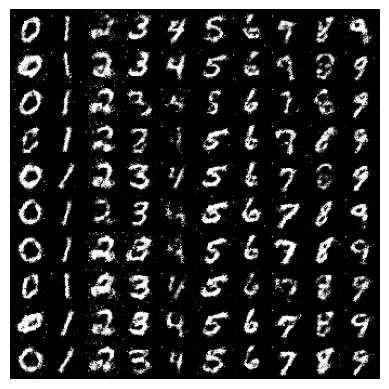

In [107]:
import torch
import matplotlib.pyplot as plt
import torchvision.utils as vutils

saved_model_path = '/content/drive/MyDrive/data/gen_im/model.pth'
generator.load_state_dict(torch.load(saved_model_path))
n_row = 10

generator.eval()

num_samples_per_class = 10


z = Variable(torch.FloatTensor(np.random.normal(0, 1, (opt.n_classes * num_samples_per_class, opt.latent_dim))))
labels = Variable(torch.LongTensor(np.array([i for _ in range(num_samples_per_class) for i in range(opt.n_classes)])))

if cuda:
    z = z.cuda()
    labels = labels.cuda()

with torch.no_grad():
    generated_images = generator(z, labels)


img_grid = vutils.make_grid(generated_images.data, nrow=num_samples_per_class, normalize=True)
img_np = img_grid.cpu().numpy().transpose((1, 2, 0))

plt.imshow(img_np)
plt.axis("off")
plt.show()
